In [3]:
!pip install pandas

     |████████████████████████████████| 13.1 MB 30.0 MB/s            
     |████████████████████████████████| 19.5 MB 126.4 MB/s            
     |████████████████████████████████| 347 kB 105.6 MB/s            
     |████████████████████████████████| 509 kB 68.0 MB/s            
You should consider upgrading via the '/cs/student/projects2/aisd/2024/giliev/finqaEnv/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install matplotlib

     |████████████████████████████████| 8.3 MB 28.2 MB/s            
     |████████████████████████████████| 321 kB 107.8 MB/s            
     |████████████████████████████████| 1.6 MB 67.0 MB/s            
     |████████████████████████████████| 111 kB 128.1 MB/s            
     |████████████████████████████████| 4.6 MB 128.9 MB/s            
     |████████████████████████████████| 4.5 MB 107.0 MB/s            
You should consider upgrading via the '/cs/student/projects2/aisd/2024/giliev/finqaEnv/bin/python3 -m pip install --upgrade pip' command.


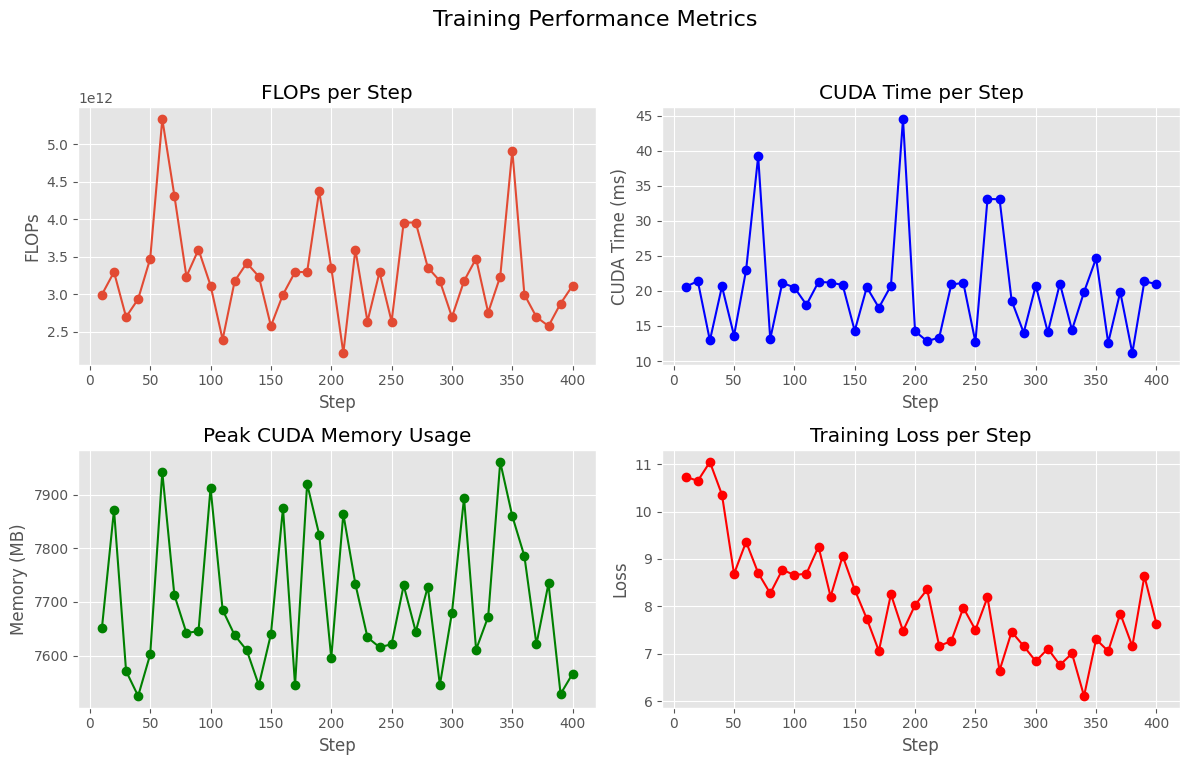

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the tracker log
df = pd.read_csv("training_tracker_metrics.csv")

# Plot settings
plt.style.use("ggplot")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Training Performance Metrics", fontsize=16)

# FLOPs
axs[0, 0].plot(df["Step"], df["FLOPs"], marker="o")
axs[0, 0].set_title("FLOPs per Step")
axs[0, 0].set_xlabel("Step")
axs[0, 0].set_ylabel("FLOPs")

# CUDA Time
axs[0, 1].plot(df["Step"], df["CUDA Time (ms)"], marker="o", color="blue")
axs[0, 1].set_title("CUDA Time per Step")
axs[0, 1].set_xlabel("Step")
axs[0, 1].set_ylabel("CUDA Time (ms)")

# Memory
axs[1, 0].plot(df["Step"], df["Memory (MB)"], marker="o", color="green")
axs[1, 0].set_title("Peak CUDA Memory Usage")
axs[1, 0].set_xlabel("Step")
axs[1, 0].set_ylabel("Memory (MB)")

# Loss
axs[1, 1].plot(df["Step"], df["Loss"], marker="o", color="red")
axs[1, 1].set_title("Training Loss per Step")
axs[1, 1].set_xlabel("Step")
axs[1, 1].set_ylabel("Loss")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
